### Importing required Libraries

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

### Reading the Dataset

In [ ]:
data = pd.read_csv("data.csv",header=0)# here header 0 means the 0 th row is our coloumn
                                                # header in data

In [ ]:
print(data.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

### Preprocessing the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
-----------------------------------
['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']
------------------------------------
['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Inserting Count Plot

<Axes: xlabel='diagnosis', ylabel='count'>

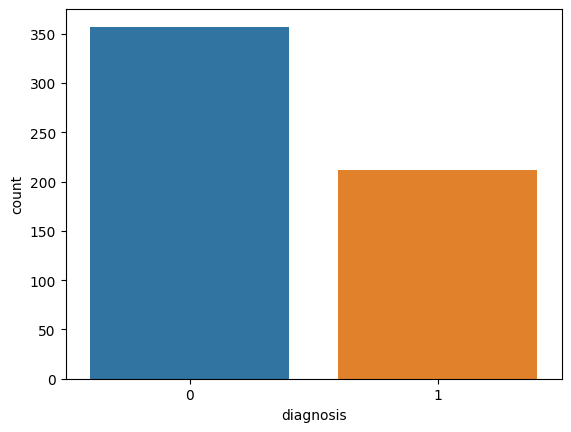

In [ ]:
# lets get the frequency of cancer stages
sns.countplot(data = data
            ,x = 'diagnosis',label="Count")

### Visualizing the Corelation using Heatmap

<Axes: >

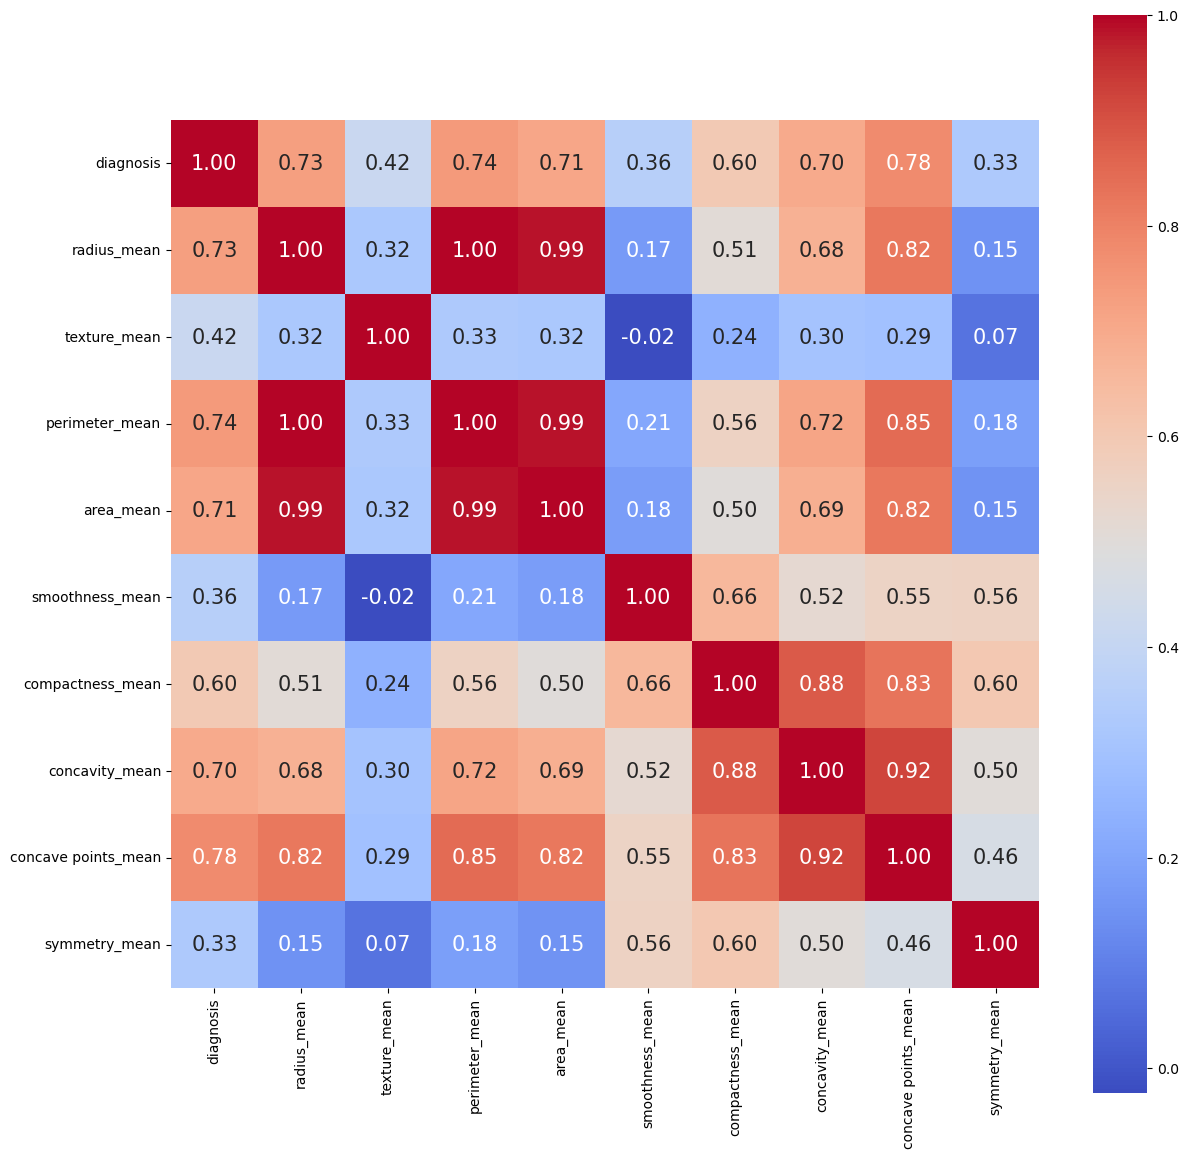

In [ ]:
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [ ]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

### Splitting the Dataset into training and testing

In [ ]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [ ]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var]
test_y =test.diagnosis

### Using RandomForestClassifier to train and test

In [ ]:
model=RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
test=model.predict(test_X)

### Accuracy of Test using RandomForestClassifier

In [ ]:
metrics.accuracy_score(test,test_y)

0.9181286549707602

### Using SVM to train and test

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

### Accuracy of test using SVM

In [ ]:
metrics.accuracy_score(prediction,test_y)

0.9122807017543859

array([[<Axes: xlabel='diagnosis', ylabel='diagnosis'>,
        <Axes: xlabel='radius_mean', ylabel='diagnosis'>,
        <Axes: xlabel='texture_mean', ylabel='diagnosis'>,
        <Axes: xlabel='perimeter_mean', ylabel='diagnosis'>,
        <Axes: xlabel='area_mean', ylabel='diagnosis'>,
        <Axes: xlabel='smoothness_mean', ylabel='diagnosis'>,
        <Axes: xlabel='compactness_mean', ylabel='diagnosis'>,
        <Axes: xlabel='concavity_mean', ylabel='diagnosis'>,
        <Axes: xlabel='concave points_mean', ylabel='diagnosis'>,
        <Axes: xlabel='symmetry_mean', ylabel='diagnosis'>],
       [<Axes: xlabel='diagnosis', ylabel='radius_mean'>,
        <Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='texture_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='radius_mean'>,
        <Axes: xlabel='compactnes

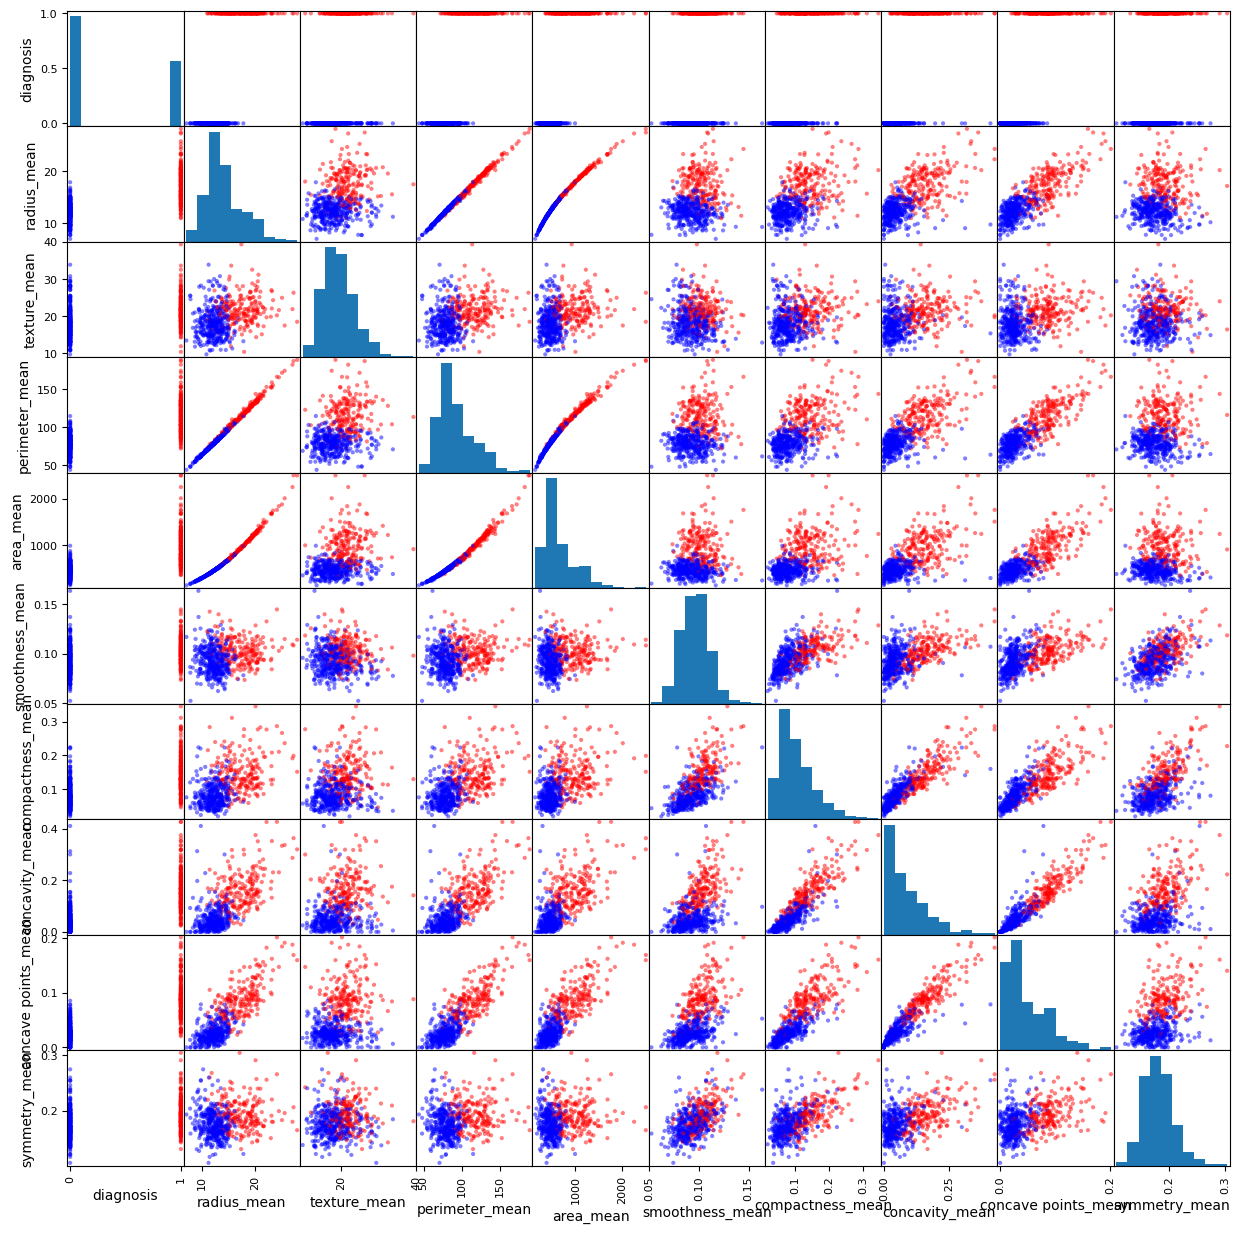

In [ ]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15))

In [ ]:
def classification_model(model,data,prediction_input,output):
  model.fit(data[prediction_input],data[output])
  predictions = model.predict(data[prediction_input])
  accuracy = metrics.accuracy_score(predictions,data[output])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%


In [ ]:
model = svm.SVC()

classification_model(model,data,prediction_var,outcome_var)

Accuracy : 88.752%


In [ ]:
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.807%


In [ ]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    print(clf.best_score_)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

In [ ]:
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}
the bset estimator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=3)
The best score is 
0.8992948717948719
